As a part of implementing linear and polynomial regression, we will load the training data hw1xtr.dat and hw1ytr.dat   into the memory. As well as, we will plot the train dataset to get a overview of the given data and their pattern.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
# Loading Training data x and y

trainx = pd.read_csv('hw1xtr.dat.txt',  header = None) 
trainy = pd.read_csv('hw1ytr.dat.txt', header = None) 

xTrain = trainx.values
yTrain = trainy.values


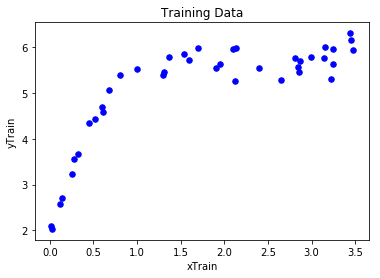

In [3]:
# Plot the training data

plt.scatter(xTrain, yTrain, color = 'b',  marker = "o", s = 30)
plt.title('Training Data')
plt.xlabel('xTrain')
plt.ylabel('yTrain')
plt.show()


Now, we will load the test data hw1xte.dat and hw1yte.dat into the memory. As well as, we will plot both the test data.

In [4]:
# Loading Test data x and y

testx = pd.read_csv('hw1xte.dat.txt',  header = None) 
testy = pd.read_csv('hw1yte.dat.txt', header = None) 

xTest = testx.values
yTest = testy.values


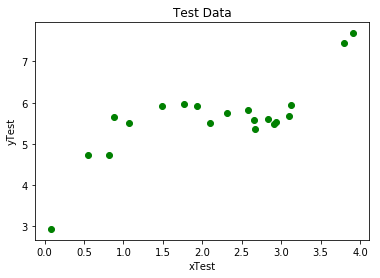

In [5]:
# Plot the test data

plt.scatter(xTest, yTest, color = 'g')
plt.title('Test Data')
plt.xlabel('xTest')
plt.ylabel('yTest')
plt.show()

In order to implement Linear Regression, we need to obtain a 2-dimensional weight vector. For that, we will add a column vector of 1’s to the features with the training data. After that, we will use formula of weight vector for  regression.

In [6]:
# creating 2-dim matrix with column vector of 1's

X1 = np.c_[np.ones(len(xTrain)), xTrain]

# calculating weight vector

xT = X1.transpose()
xTx = xT.dot(X1)
invxTx = np.linalg.inv(xTx)
invxTxxT = invxTx.dot(xT)
weight = invxTxxT.dot(yTrain)


We will be creating a function which will calculate the predicted y value for the given train data x using the calculated weight from training phase. Plotting the train x data and new predicted y values, we will get the linear regression line for training data.

In [7]:
# gerenating linear regression line for train data

y_predtr1 = []
def linear_regression_tr(x, y, w):
    
    # Plotting the train data as scatter plot 
    plt.scatter(x, y, label = 'Train Data',color = "b") 
    
    # calculating y pred
    global y_predtr1
    y_predtr1 = w[0] + w[1]*x 
    
    # Plotting the linear regression line 
    plt.plot(x, y_predtr1,label='Linear Regression Line', color = "r") 
    plt.title('Linear Regression for Training Data')
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.legend()
    plt.show() 
 

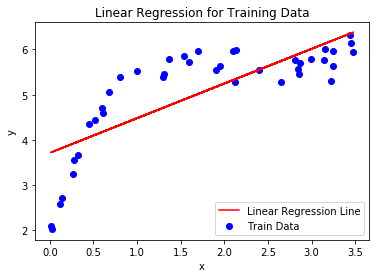

In [8]:
# calling the function for linear regression line for train data

linear_regression_tr(xTrain, yTrain, weight)

Now, we will caculate the average error on the training set implementing equation 1.

In [9]:
#calculating average error on the training set

hy1 = y_predtr1 - yTrain
sqhy1 = np.square(hy1)
sum1 = np.sum(sqhy1)
error1 = sum1/len(xTrain)

print("The average error of Linear Regression on the training set is ", error1)


The average error of Linear Regression on the training set is  0.5085888601660317


We will be creating a function which will calculate the predicted y value for the given test data x using the calculated weight from training phase. Plotting the test x data and new predicted y values, we will get the linear regression line for test data.

In [10]:
# gerenating linear regression line for test data

y_predte1 = []
def linear_regression_te(x, y, w): 
    # Plotting the test data as scatter plot 
    plt.scatter(x, y,label = 'Test Data', color = "g") 
    
    # calculating y pred
    global y_predte1
    y_predte1 = w[0] + w[1]*x 
    
    # Plotting the linear regression line 
    plt.plot(x, y_predte1,label='Linear Regression Line',  color = "r") 
    plt.title('Linear Regression for Test Data')
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.legend()
    plt.show() 
 

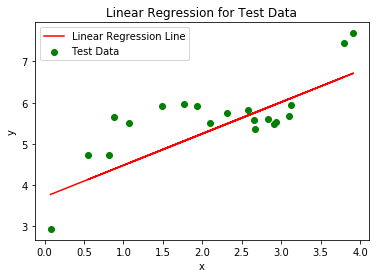

In [11]:
# calling the function for linear regression line for test data

linear_regression_te(xTest, yTest, weight)

Now, we will caculate the average error on the test set implementing equation 1.

In [12]:
#calculating average error on the test set

hy11 = y_predte1 - yTest
sqhy11 = np.square(hy11)
sum11 = np.sum(sqhy11)
error11 = sum11/len(xTest)

print("The average error of Linear Regression on the test set", error11)


The average error of Linear Regression on the test set 0.44391185790775


The average error on the training set and test set are 0.5085888601660317 and 0.44391185790775. From this, we can say that the predicted linear regression line is performing well on test data rather than train data.

In order to implement 2nd-order polynomial Regression, we need to obtain a 3-dimensional weight vector. For that, we will add a column vector of square of the training data x and a column vector of 1’s to the features with the training data. After that, we will use formula of weight vector for regression.

In [13]:
# creating 3-dim matrix 
X2 = np.c_[np.ones(len(xTrain)), xTrain, np.power(xTrain,2)]

# calculating weight vector
xT2 = X2.transpose()
xTx2 = xT2.dot(X2)
invxTx2 = np.linalg.inv(xTx2)
invxTxxT2 = invxTx2.dot(xT2)
weight2 = invxTxxT2.dot(yTrain)


We will be creating a function which will calculate the predicted y value using the calculated weight from training phase for a newly constructed 1-D vector. Plotting the newly constructed 1-D vector and new predicted y values, we will get the 2nd-order polynomial regression line for training data.


In [14]:
# gerenating 2nd-order polynomial regression line for train data

y_predtr2 = []
def sec_plonomial_regression_tr(x, y, w): 
    
    # Plotting the train data as scatter plot
    plt.scatter(x, y, label = 'Train Data', color = "b") 

    # newly constracted 1-D vector
    x_new = np.linspace(xTrain.min(), xTrain.max(), 100)
    
    # calculating y pred
    global y_predtr2
    y_predtr2 = w[2]*np.square(x_new) + w[1]*x_new + w[0] 

    # Plotting the 2nd-order polynomial regression line 
    plt.plot(x_new, y_predtr2, label='2nd-order polynomial Regression Line', color = "r")  
    plt.title('The 2nd-order polynomial Regression for Training Data')
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.legend()
    plt.show() 


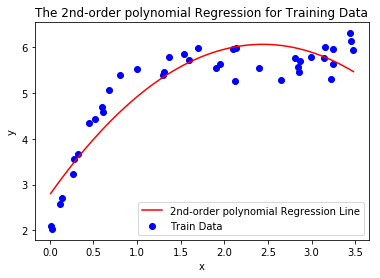

In [15]:
# calling the function for 2nd-order polynomial line for train data
sec_plonomial_regression_tr(xTrain, yTrain, weight2)


Now, we will caculate the average error on the training set implementing equation 1.

In [16]:
#calculating average error on the training set

hy2 = weight2[2]*np.square(xTrain) + weight2[1]*xTrain + weight2[0] - yTrain
sqhy2 = np.square(hy2)
sum2 = np.sum(sqhy2)
error2 = sum2/len(xTrain)

print("The average error of 2nd-order polynomial Regression on the training set", error2)


The average error of 2nd-order polynomial Regression on the training set 0.2009852319839665


We will be creating a function which will calculate the predicted y value using the calculated weight from training phase for a newly constructed 1-D vector. Plotting the newly constructed 1-D vector and new predicted y values, we will get the 2nd-order polynomial regression line with respect to test data.

In [17]:
# gerenating 2nd-order polynomial regression line for test data

y_predte2 = []
def sec_plonomial_regression_te(x, y, w): 
    
    # Plotting the test data as scatter plot
    plt.scatter(x, y, label = 'Test Data', color = "g") 

    # newly constracted 1-D vector
    x_new = np.linspace(xTrain.min(), xTrain.max(), 100)
    
    # calculating y pred
    global y_predte2
    y_predte2 = w[2]*np.square(x_new) + w[1]*x_new + w[0] 
  
    # Plotting the regression line 
    plt.plot(x_new, y_predte2, label='2nd-order polynomial Regression Line', color = "r")  
    plt.title('The 2nd-order polynomial Regression for Test Data')
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.legend()
    plt.show()
    

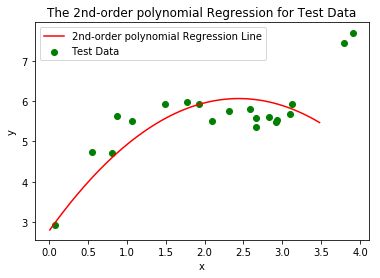

In [18]:
# calling the function for 2nd-order polynomial line for test data

sec_plonomial_regression_te(xTest, yTest, weight2)

Now, we will caculate the average error on the test set implementing equation 1.

In [19]:
#calculating average error on the test set

hy22 = weight2[2]*np.square(xTest) + weight2[1]*xTest + weight2[0] - yTest
sqhy22 = np.square(hy22)
sum22 = np.sum(sqhy22)
error22 = sum22/len(xTest)

print("The average error of 2nd-order polynomial Regression on the test set", error22)


The average error of 2nd-order polynomial Regression on the test set 0.8532633206012233


In [20]:
#Comparison

models = pd.DataFrame({
    'Model': ['Linear Regression', 
              '2nd-order Polinomial Regression'],
    'Training Error': [error1, error2],
    'Test Error': [error11, error22],
})
models.sort_values(by='Test Error',ascending=True)

,Model,Training Error,Test Error
0,Linear Regression,0.508589,0.443912
1,2nd-order Polinomial Regression,0.200985,0.853263


We can see from the table that test error for the 2nd-order polynomial Regression is much greater than training error which is a varience problem. This causes overfitting issue. This doesn't reflect an ideal example of a good fitted model. 

Comparing the average Test error of the linear and  2nd-order polynomial Regression, the linear regression model is producing lowest test error. And also, the test error is lower than the training error for the linear regression model. From this, we can say that the predicted linear regression line is a better fit than the 2nd-order polynomial Regression line.

In order to implement 3rd-order polynomial Regression, we need to obtain a 4-dimensional weight vector. For that, we will add a column vector of x to the third power of the training data x, a column vector of square of the training data x and a column vector of 1’s to the features with the training data. After that, we will use formula of weight vector for regression.

In [21]:
# creating 4-dim matrix 

X3 = np.c_[np.ones(len(xTrain)), xTrain, np.power(xTrain,2), np.power(xTrain,3)]

# calculating weight vector

xT3 = X3.transpose()
xTx3 = xT3.dot(X3)
invxTx3 = np.linalg.inv(xTx3)
invxTxxT3 = invxTx3.dot(xT3)
weight3 = invxTxxT3.dot(yTrain)

We will be creating a function which will calculate the predicted y value using the calculated weight from training phase for a newly constructed 1-D vector. Plotting the newly constructed 1-D vector and new predicted y values, we will get the 3rd-order polynomial regression line for training data.

In [22]:
# gerenating 3rd-order polynomial regression line for train data

y_predtr3 = []
def trd_plonomial_regression_tr(x, y, w): 
    
     # Plotting the train data as scatter plot
    plt.scatter(x, y,label = 'Train Data', color = "b") 

    # newly constracted 1-D vector
    x_new = np.linspace(xTrain.min(), xTrain.max(), 100)
    
    # calculating y pred
    global y_predtr3
    y_predtr3 = w[3]*np.power(x_new,3) + w[2]*np.square(x_new) + w[1]*x_new + w[0] 
  
    # Plotting the 3rd-order polynomial regression line 
    plt.plot(x_new, y_predtr3,label='3rd-order polynomial Regression Line', color = "r")  
    plt.title('The 3rd-order polynomial Regression for Training Data')
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.legend()
    plt.show() 

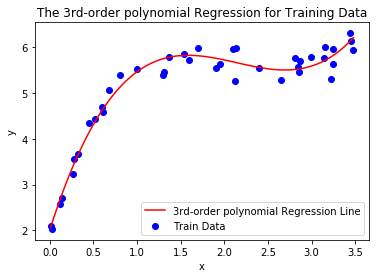

In [23]:
# calling the function for 3rd-order polynomial line for train data
trd_plonomial_regression_tr(xTrain, yTrain, weight3)


Now, we will caculate the average error on the training set implementing equation 1.

In [24]:
#calculating average error on the training set

hy3 = weight3[3]*np.power(xTrain, 3) + weight3[2]*np.square(xTrain) + weight3[1]*xTrain + weight3[0] - yTrain
sqhy3 = np.square(hy3)
sum3 = np.sum(sqhy3)
error3 = sum3/len(xTrain)

print("The average error of 3rd-order polynomial regression on the training set", error3)


The average error of 3rd-order polynomial regression on the training set 0.03922874661114208


We will be creating a function which will calculate the predicted y value using the calculated weight from training phase for a newly constructed 1-D vector. Plotting the newly constructed 1-D vector and new predicted y values, we will get the 3rd-order polynomial regression line with respect to test data.

In [25]:
# gerenating 3rd-order polynomial regression line for test data

y_predte3 = []
def trd_plonomial_regression_te(x, y, w): 
    
    # Plotting the test data as scatter plot
    plt.scatter(x, y,  label = 'Test Data', color = "g") 
    
    # newly constracted 1-D vector
    x_new = np.linspace(xTrain.min(), xTrain.max(), 100)
    
    # calculating y pred
    global y_predte3
    y_predte3 = w[3]*np.power(x_new,3) + w[2]*np.square(x_new) + w[1]*x_new + w[0] 
  
    # the 3rd-order polynomial regression line 
    plt.plot(x_new, y_predte3, label='3rd-order polynomial Regression Line', color = "r")  
    plt.title('The 3rd-order polynomial Regression for Test Data')
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.legend()
    plt.show()

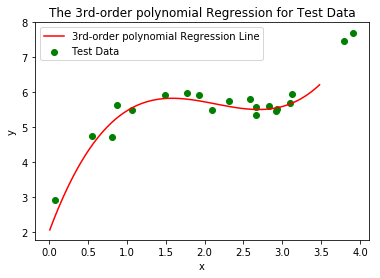

In [26]:
# calling the function for 3rd-order polynomial line for test data

trd_plonomial_regression_te(xTest, yTest, weight3)

Now, we will caculate the average error on the test set implementing equation 1.

In [27]:
#calculating average error on the test set

hy33 = weight3[3]*np.power(xTest, 3) +weight3[2]*np.square(xTest) + weight3[1]*xTest + weight3[0] - yTest
sqhy33 = np.square(hy33)
sum33 = np.sum(sqhy33)
error33 = sum33/len(xTest)

print("The average error of 3rd-order polynomial regression on the test set", error33)

The average error of 3rd-order polynomial regression on the test set 0.05641833004408866


In [28]:
#Comparison
models = pd.DataFrame({
    'Model': ['Linear Regression', 
              '2nd-order Polinomial Regression',
             '3rd-order Polinomial Regression'],
    'Training Error': [error1, error2, error3],
    'Test Error': [error11, error22, error33],
})
models.sort_values(by='Test Error',ascending=True)


,Model,Training Error,Test Error
2,3rd-order Polinomial Regression,0.039229,0.056418
0,Linear Regression,0.508589,0.443912
1,2nd-order Polinomial Regression,0.200985,0.853263


We can see from the table that test error for the 3rd-order polynomial Regression is low and slightly higher than the training error. This is a sign that this model is a good fit.

Comparing the average Test error of the linear, 2nd-order polynomial Regression and 3rd-order Polinomial Regression, the 3rd-order Polinomial Regression model is producing lowest test error and a good fitted model itself. From this, we can say that the predicted 3rd-order Polinomial Regression line is a better fit than the linear and the 2nd-order polynomial Regression line.

In order to implement 4th-order polynomial Regression, we need to obtain a 5-dimensional weight vector. For that, we will add a column vector of x to the fourth power of the training data x, a column vector of x to the third power of the training data x, a column vector of square of the training data x and a column vector of 1’s to the features with the training data. After that, we will use formula of weight vector for regression.


In [29]:
# creating 5-dim matrix 
X4 = np.c_[np.ones(len(xTrain)), xTrain, np.power(xTrain,2), np.power(xTrain,3), np.power(xTrain,4)]

# calculating weight vector
xT4 = X4.transpose()
xTx4 = xT4.dot(X4)
invxTx4 = np.linalg.inv(xTx4)
invxTxxT4 = invxTx4.dot(xT4)
weight4 = invxTxxT4.dot(yTrain)

We will be creating a function which will calculate the predicted y value using the calculated weight from training phase for a newly constructed 1-D vector. Plotting the newly constructed 1-D vector and new predicted y values, we will get the 4th-order polynomial regression line for training data.


In [30]:
# gerenating 4th-order polynomial regression line for train data

y_predtr4 = []
def fr_plonomial_regression_tr(x, y, w): 
    
    # Plotting the train data as scatter plot
    plt.scatter(x, y,label = 'Train Data', color = "b") 

    # newly constracted 1-D vector
    x_new = np.linspace(xTrain.min(), xTrain.max(), 100)
    
    # calculating y pred
    global y_predtr4
    y_predtr4 = w[4]*np.power(x_new,4) + w[3]*np.power(x_new,3) + w[2]*np.square(x_new) + w[1]*x_new + w[0] 
  
    # plotting the 4th-order polynomial regression line  
    plt.plot(x_new, y_predtr4, label='4th-order polynomial Regression Line', color = "r")  
    plt.title('The 4th-order polynomial Regression for Training Data')
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.legend()
    plt.show() 

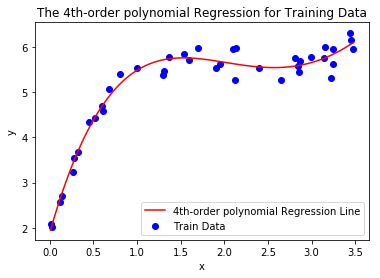

In [31]:
# calling the function for 4th-order polynomial line for train data
fr_plonomial_regression_tr(xTrain, yTrain, weight4)


Now, we will caculate the average error on the training set implementing equation 1.

In [32]:
#calculating average error on the training set

hy4 = weight4[4]*np.power(xTrain,4) + weight4[3]*np.power(xTrain, 3) + weight4[2]*np.square(xTrain) + weight4[1]*xTrain + weight4[0] - yTrain
sqhy4 = np.square(hy4)
sum4 = np.sum(sqhy4)
error4 = sum4/len(xTrain)

print("The average error of 3rd-order polynomial regression on the training set", error4)


The average error of 3rd-order polynomial regression on the training set 0.0356447072443992


We will be creating a function which will calculate the predicted y value using the calculated weight from training phase for a newly constructed 1-D vector. Plotting the newly constructed 1-D vector and new predicted y values, we will get the 4th-order polynomial regression line with respect to test data.

In [33]:
# gerenating 4th-order polynomial regression line for test data

y_predte4 = []
def fr_plonomial_regression_te(x, y, w): 
    
    # Plotting the test data as scatter plot
    plt.scatter(x, y, label = 'Test Data', color = "g") 

    # newly constracted 1-D vector
    x_new = np.linspace(xTrain.min(), xTrain.max(), 100)
    
    # calculating y pred
    global y_predte4
    y_predte4 = w[4]*np.power(x_new,4) + w[3]*np.power(x_new,3) + w[2]*np.square(x_new) + w[1]*x_new + w[0] 
  
    # Plotting the 4th-order polynomial Regression Line
    plt.plot(x_new, y_predte4,label='4th-order polynomial Regression Line', color = "r")  
    plt.title('The 4th-order polynomial Regression for Test Data')
    plt.xlabel('x') 
    plt.ylabel('y')
    plt.legend()
    plt.show()

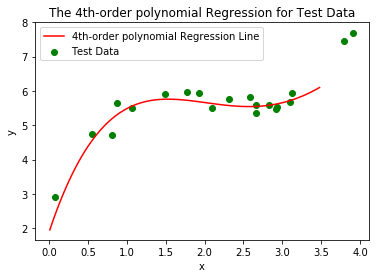

In [34]:
# calling the function for 3rd-order polynomial line for test data
fr_plonomial_regression_te(xTest, yTest, weight4)

Now, we will caculate the average error on the test set implementing equation 1.

In [35]:
#calculating average error on the test set

hy44 = weight4[4]*np.power(xTest, 4) + weight4[3]*np.power(xTest, 3) +weight4[2]*np.square(xTest) + weight4[1]*xTest + weight4[0] - yTest
sqhy44 = np.square(hy44)
sum44 = np.sum(sqhy44)
error44 = sum44/len(xTest)

print("The average error of 3rd-order polynomial regression on the test set", error44)

The average error of 3rd-order polynomial regression on the test set 0.12722197193357127


In [36]:
#Comparison
models = pd.DataFrame({
    'Model': ['Linear Regression', 
              '2nd-order Polinomial Regression',
             '3rd-order Polinomial Regression',
             '4th-order Polinomial Regression'],
    'Training Error': [error1, error2, error3, error4],
    'Test Error': [error11, error22, error33, error44],
})
models.sort_values(by='Test Error',ascending=True)


,Model,Training Error,Test Error
2,3rd-order Polinomial Regression,0.039229,0.056418
3,4th-order Polinomial Regression,0.035645,0.127222
0,Linear Regression,0.508589,0.443912
1,2nd-order Polinomial Regression,0.200985,0.853263


We can see from the table that test error for the 4th-order polynomial Regression is much higher than training error which is a varience problem. This causes overfitting issue. This doesn't reflect an ideal example of a good fitted model. 

Comparing the average Test error of the linear, 2nd-order polynomial Regression, 3rd-order Polinomial Regression and 4th-order Polinomial Regression, the 3rd-order Polinomial Regression model is producing lowest test error and a good fitted model itself. From this, we can say that the predicted 3rd-order Polinomial Regression line is a better fit model than the linear, the 2nd-order polynomial Regression and 4th-order Polinomial Regression line.


We aim here to implement L2-regularized for the 4th-order polynomial Regression using the training data. we will use the 5-D matrix created on the previous answer named X4 which contains a column vector of x to the third power of the training data x, a column vector of square of the training data x and a column vector of 1’s to the features with the training data. After that, we will use formula of weight vector. while calculating the weight vector, we will use 6 different given λ value 0.01, 0.1, 1, 10, 100, 1000. And, for 6 different λ we will calculate 6 different weight vectors. Using those 6 weights, we will calculate the training error averaged over all instances. This will give us 6 different training errors for the 6 given λ value.

In [37]:
# components for weight calculation

xTx4 = X4.transpose().dot(X4)
xTy = X4.transpose().dot(yTrain)

# identity matrix 
i = np.identity(len(xTx4))
i[0][0] = 0

In [38]:
# λ values
L = [0.01, 0.1, 1, 10, 100, 1000]

W =[]
errortr = []

# calculating 6 weights and 6 training error for 6 given λ
for x in L:
    
    # weight
    LI = x*i
    inv = np.linalg.inv(xTx4 + LI)
    w = inv.dot(xTy)
    W.append(w)
    
    # error
    h = X4.dot(w)
    hy = h -yTrain
    sqhy = np.square(hy)
    sum = np.sum(sqhy)
    mean = sum/len(xTrain)
    errortr.append(mean)
    
print("6 Training errors for L2 regularization for the 4th-order polynomial regression ",errortr)    
  

6 Training errors for L2 regularization for the 4th-order polynomial regression  [0.03739599518339808, 0.06844372003857341, 0.15265564122519787, 0.4494125923057126, 0.6541322428423528, 0.8703848180845201]


Now, we will create a 5-D matrix which will contain a column vector of x to the fourth power of the test data x, a column vector of x to the third power of the test data x, a column vector of square of the test data x and a column vector of 1’s to the features with the test data.  Using the 6 weights calculated from training, we will calculate the test error averaged over all instances for test data. This will give us 6 different test errors for the 6 given λ value.

In [39]:
# creating 5-D matrix
X44 = np.c_[np.ones(len(xTest)), xTest, np.power(xTest,2), np.power(xTest,3), np.power(xTest,4)]

errorte = []
count = 0

# calculating 6 test error for 6 given λ
for x in L:
    
    ht = X44.dot(W[count])
    hyt = ht-yTest
    sqhyt = np.square(hyt)
    sum = np.sum(sqhyt)
    mean = sum/len(xTest)
    errorte.append(mean)
    count = count+1
    
print("6 Test errors for L2 regularization for the 4th-order polynomial regression ",errorte)

6 Test errors for L2 regularization for the 4th-order polynomial regression  [0.08187555427182609, 0.05702242426729154, 0.10362435733059117, 0.8992500727744547, 0.8172447612107077, 0.5330302440962492]


With the calculated train and test error, we will plot the train and test error as a function of lamda.

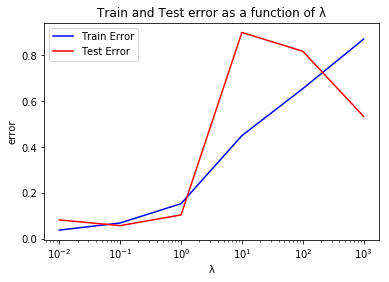

In [42]:
# plot the train and test error

plt.plot(L,errortr,label= "Train Error", color= 'b')
plt.plot(L,errorte, label= "Test Error", color= 'r')
plt.title('Train and Test error as a function of λ')
plt.xscale("log")
plt.xlabel('λ') 
plt.ylabel('error') 
plt.legend()
plt.show()


In [43]:
#Comparison
models = pd.DataFrame({
    'λ': ['0.01',
              '0.1',
              '1',
              '10',
              '100',
             '1000'],
    'Training Error': [errortr[0], errortr[1], errortr[2], errortr[3], errortr[4], errortr[5]],
    'Test Error': [errorte[0], errorte[1], errorte[2], errorte[3],errorte[4],errorte[5]],
})
models.sort_values(by='λ',ascending=True)


,λ,Training Error,Test Error
0,0.01,0.037396,0.081876
1,0.1,0.068444,0.057022
2,1,0.152656,0.103624
3,10,0.449413,0.899250
4,100,0.654132,0.817245
5,1000,0.870385,0.533030


Comparing the average Test error for all the λ values from the table, we can say that test error for λ= 0.1 is the lowest of them all. Along with that, the test error for λ=0.1 is lower than training error which is a sign that this model is a good fitted model. According to this, the best λ for fitting the data is 0.1 for L2-regularization for the 4th-order polynomial regression.

In order to plot the value of each weight parameter as a function of λ, we will use the previously calculated weight vector, W.

In [44]:
# reconstracting weight vector

WeightMat = np.transpose(np.concatenate((W[0],W[1],W[2],W[3],W[4],W[5]),1))

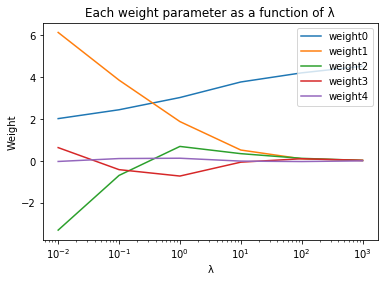

In [45]:
# plotting the value of each weight parameter as a function of λ

plt.plot(L,WeightMat[:,0], label='weight0')
plt.plot(L,WeightMat[:,1], label='weight1')
plt.plot(L,WeightMat[:,2], label='weight2')
plt.plot(L,WeightMat[:,3], label='weight3')
plt.plot(L,WeightMat[:,4], label='weight4')

plt.title('Each weight parameter as a function of λ')
plt.xscale("log")
plt.xlabel('λ') 
plt.ylabel('Weight')
plt.legend()
plt.show()

In order to performs five-fold cross-validation on my training data, I have splitted the training data into 5 sections. I have written two functions Train and Validation which will create 5 training sets and 5 validation sets combining 5 splitted sets in different combination. 

In [46]:
# creating training sets in different combination 
def Train(X,l):
    
    foldset = []
    for x in range(l):
        fold = (X[x%l],X[(x+1)%l],X[(x+2)%l],X[(x+3)%l])
        foldset.append(np.vstack(fold))
    return foldset
    
# creating Validation sets in different combination 
def Validation(X,l):
    
    foldset = []
    for x in range(l):
        foldset.append(X[(x+4)%l])
    return foldset


I have added another function, kFoldTrain which will calculate 6 different weight vectors for 6 different λ.

In [47]:
def kFoldTrain(x,y) :
    
    #creating 5-D matrix
    Xf= np.c_[np.ones(len(x)), x, np.power(x,2), np.power(x,3), np.power(x,4)]
    
    xTxf = Xf.transpose().dot(Xf)
    xTyf = Xf.transpose().dot(y)
    
    i1 = np.identity(len(xTxf))
    i1[0][0] = 0
    
    Wf =[]
    #Weight calculation
    for elem in L:
        LI = elem*i1
        inv = np.linalg.inv(xTxf + LI)
        w = inv.dot(xTyf)
        Wf.append(w)
    
    return Wf

Another function, kFoldVal which will 6 different validation errors for the 6 given λ value.

In [48]:
def kFoldVal(x,y,w) :
    
    #creating 5-D matrix
    Xf = np.c_[np.ones(len(x)), x , np.power(x ,2), np.power(x ,3), np.power(x ,4)]

    errorte = []
    count = 0
    
    #Weight calculation
    for elem in L:

        ht = Xf.dot(w[count])
        hyt = ht-y
        sqhyt = np.square(hyt)

        sum = np.sum(sqhyt)
        mean = sum/len(x)
        errorte.append(mean)
        count = count+1
        
    return errorte

In [49]:
#splitting training set into 5 sets
xTr = np.array_split(xTrain,5)
yTr = np.array_split(yTrain,5)

# creating 5 training sets 5 splitted sets in different combination
xTrainNew = Train(xTr, 5)
yTrainNew = Train(yTr, 5)

# creating 5 validation sets 5 splitted sets in different combination
xValNew = Validation(xTr, 5)
yValNew = Validation(yTr, 5)


In [50]:
#creating 6 different validation errors for the 6 given λ value for each sets

#one set
W1 = kFoldTrain(xTrainNew[0], yTrainNew[0])
er1 = kFoldVal(xValNew[0],yValNew[0], W1)

#2nd set
W2 = kFoldTrain(xTrainNew[1], yTrainNew[1])
er2 = kFoldVal(xValNew[1],yValNew[1], W2)

#3rd set
W3 = kFoldTrain(xTrainNew[2], yTrainNew[2])
er3 = kFoldVal(xValNew[2],yValNew[2], W3)

#4th set
W4 = kFoldTrain(xTrainNew[3], yTrainNew[3])
er4 = kFoldVal(xValNew[3],yValNew[3], W4)

#5th set
W5 = kFoldTrain(xTrainNew[3], yTrainNew[3])
er5 = kFoldVal(xValNew[3],yValNew[3], W5)


Now we will calculate the average error on the validation set as a function of λ from the validation errors from the 5 sets.

In [51]:
# calculating average error
Lam = []
for x in range(6):
    Lam.append((er1[x]+er2[x]+er3[x]+er4[x]+er5[x])/5)
print('The average error on the validation set ',Lam)

The average error on the validation set  [0.06155138674395878, 0.08917483349053956, 0.1742242922135783, 0.47894390952761184, 0.6827234239976796, 0.8943413698306164]


In [52]:
#Comparison
models = pd.DataFrame({
    'λ': ['0.01',
              '0.1',
              '1',
              '10',
              '100',
             '1000'],
    'Validation Error': [Lam[0], Lam[1], Lam[2], Lam[3],Lam[4],Lam[5]],
})
models.sort_values(by='λ',ascending=True)


,λ,Validation Error
0,0.01,0.061551
1,0.1,0.089175
2,1,0.174224
3,10,0.478944
4,100,0.682723
5,1000,0.894341


Comparing the average Validation error for all the λ values from the table, we can say that test error for λ= 0.01 is the lowest of them all. According to this, the best λ for fitting the data is 0.01 for five-fold cross-validation L2-regularization for the 4th-order polynomial regression.

We can see that this best λ is not same as the best λ in (a).

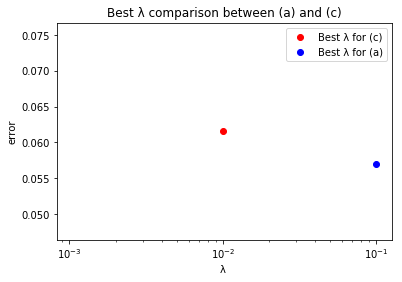

In [53]:
# plotting comparison betwwen best λ of(a) and (c)
plt.scatter(L[0],Lam[0], label = "Best λ for (c)", color= 'r')
plt.scatter(L[1],errorte[1],label = "Best λ for (a)", color= 'b')
plt.title('Best λ comparison between (a) and (c)')
plt.xscale("log")
plt.xlabel('λ ') 
plt.ylabel('error')
plt.legend()
plt.show()

We will use previously calculated weight value for λ = 0.01 and calculate the predicted y value for a newly constructed 1-D vector. Plotting the newly constructed 1-D vector and new predicted y values, we will get the L2-regularized 4th-order polynomial regression line for best λ = 0.01.

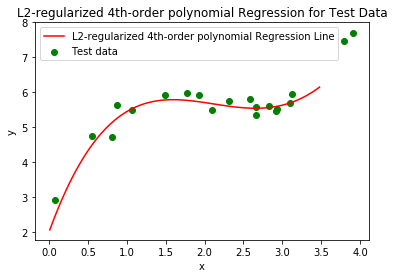

In [54]:
plt.scatter(xTest, yTest,label="Test data", color = "g") 

bestW = W[0]

x_newkf = np.linspace(xTrain.min(), xTrain.max(), 100)
y_predkf = bestW[4]*np.power(x_newkf,4) + bestW[3]*np.power(x_newkf,3) + bestW[2]*np.square(x_newkf) + bestW[1]*x_newkf + bestW[0] 

# Plotting the regression line 
plt.plot(x_newkf, y_predkf, label='L2-regularized 4th-order polynomial Regression Line', color = "r")  
plt.title('L2-regularized 4th-order polynomial Regression for Test Data')
plt.xlabel('x') 
plt.ylabel('y')
plt.legend()
plt.show()